# Viral Data Analysis

Date: 2020.10.21

Author: © 2020 Ovidijus Grigas 

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here we analyze open COVID-19 data from [https://ourworldindata.org/] to answer the following questions:

1. [Which country was leading in testing from January to June 2020?](#Q1)
2. [Correlation between total tests and total cases in Lithuania, Latvia and Estonia from January to June 2020?](#Q2)
3. [Can we predict how many new cases Lithuania, Latvia and Estonia will have in November 2020?](#Q3)

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 


Inpiration for the solution on 3rd question: https://developers.arcgis.com/python/sample-notebooks/temperature-forecast-using-time-series-data/

**Latest data fetch**: 2020-10-21

## Load the data

In [47]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [48]:
# import requests
# fname = 'owid-covid-data.csv'
# url = 'https://covid.ourworldindata.org/data/' + fname
# r = requests.get(url)
# open(fname, 'wb').write(r.content)

df = pd.read_csv("./owid-covid-data.csv", parse_dates=[3])

In [49]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51586 entries, 0 to 51585
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         51290 non-null  object        
 1   continent                        50994 non-null  object        
 2   location                         51586 non-null  object        
 3   date                             51586 non-null  datetime64[ns]
 4   total_cases                      47979 non-null  float64       
 5   new_cases                        50705 non-null  float64       
 6   new_cases_smoothed               49917 non-null  float64       
 7   total_deaths                     39175 non-null  float64       
 8   new_deaths                       50705 non-null  float64       
 9   new_deaths_smoothed              49917 non-null  float64       
 10  total_cases_per_million          47719 non-null  float64  

<a id='Q1'></a>
## 1. Which country was leading in testing from January to June 2020? 

Let's define some helper functions:

In [51]:
'''
    Split dataframe within date range. 
    For example, all rows where dates are in range -> 2020-01-01 ..... 2020-10-01.
'''
def split_dataframe_within_date_range(dataframe, column_name, date_after, date_before):
    frame_within_dates = dataframe[dataframe[column_name] > date_after]
    frame_within_dates = frame_within_dates[frame_within_dates[column_name] < date_before]
    return frame_within_dates

In [52]:
'''
    Drop all NAN's in columns and return cleaned dataframe.
'''
def clean_rows_which_cols_hold_nans(dataframe, columns_to_clean):
    cleaned_df = dataframe
    for column in columns_to_clean:
        cleaned_df = cleaned_df[cleaned_df[column].notna()]
    return cleaned_df

Column `total_tests_per_thousand` represents how much tests were made per 1000 people. To know exacly which country was leading, we need to find which country had the highest tests/1000 people number. 

Let's define the columns, which are at our interest and cut the dataframe to only represent these columns.

In [53]:
interest_columns = ["iso_code", "date", "total_tests_per_thousand"]
interest_df = df[interest_columns]

Now let's filter out any values which are missing in the dataframe column which are at our interest.

In [54]:
cleaned_interest_df = clean_rows_which_cols_hold_nans(interest_df, interest_columns)

After cleaning the dataframe, let's define dates are at our interest.

- **date_after** - represets the date from which dataframe will be sliced (it's *2020-01-01*).
- **date_before** - represents the date to which dataframe will be sliced (it's *2020-06-01*).

In [55]:
date_after = datetime.datetime(2020, 1, 1)
date_before = datetime.datetime(2020, 6, 1)

Let's slice the frame which will hold information only within defined date range.

In [56]:
frame_within_dates = split_dataframe_within_date_range(cleaned_interest_df, "date", date_after, date_before)

Now, let's find the highest value in the "total_tests_per_thousand" column.

In [57]:
max_total_tests = frame_within_dates[interest_columns[2]].max()
max_total_tests

226.0

And the country, which has the highest `total_tests_per_thousant` is:

In [58]:
max_tests_country = frame_within_dates[frame_within_dates[interest_columns[2]] == max_total_tests][interest_columns[0]]
max_tests_country = max_tests_country.tolist()[0]
max_tests_country

'ARE'

ARE - in iso format represents:

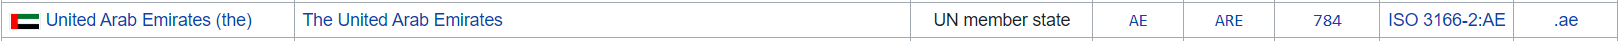

***The United Arab Emirates***

Let's plot the curve of the `total_tests_per_thousand` for this country.

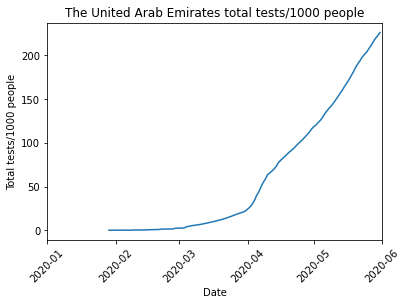

In [59]:
max_test_country_frame = frame_within_dates[frame_within_dates[interest_columns[0]] == max_tests_country]

fig, ax = plt.subplots()

plt.title("The United Arab Emirates total tests/1000 people")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Total tests/1000 people")

x = max_test_country_frame[interest_columns[1]]
y = max_test_country_frame[interest_columns[2]]

ax.set_xlim([date_after, date_before])
ax.plot(x, y)


### Conclusion of the question:

Country, which was leading in testing between January and June 2020 is - **The United Arab Emirates**.

<a id='Q2'></a>
## 2. Correlation between total tests and total cases in Lithuania, Latvia and Estonia from January to June 2020?

Let's define some helper functions.

In [60]:
'''
    Fit correlation trend and plot it together with raw data.
'''
def find_corr_trendline_plot(x, y, country):
    fig, ax = plt.subplots()

    ax.plot(x, y, '.', label="Total tests/total cases")
    w1, w0 = ma.polyfit(x,y, 1)
    x_all = np.linspace(x.min(), x.max(), 500)
    ax.plot(x_all, w0 + w1*x_all, '-', label="Trendline")
    plt.title(f"Total tests/total cases in {country}")
    plt.xlabel("Total tests")
    plt.ylabel("Total cases")
    plt.legend()

### Let's filter relevant data and clean it before use.

In [61]:
interest_columns = ["iso_code", "date", "total_cases", "total_tests"]
interest_countries = ["LTU", "LVA", "EST"]
interest_df = df[interest_columns]

cleaned_interest_df = clean_rows_which_cols_hold_nans(interest_df, interest_columns)

date_after = datetime.datetime(2020, 1, 1)
date_before = datetime.datetime(2020, 6, 1)

frame_within_dates = split_dataframe_within_date_range(cleaned_interest_df, "date", date_after, date_before)

### Lithuania

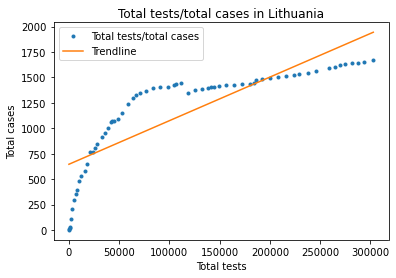

In [62]:
lithuania_frame = frame_within_dates[frame_within_dates[interest_columns[0]] == interest_countries[0]]

x = lithuania_frame[interest_columns[3]]
y = lithuania_frame[interest_columns[2]]
find_corr_trendline_plot(x, y, "Lithuania")

#### Correlation coeficient between specified columns

In [63]:
corr_lithuania = x.corr(y)
print(corr_lithuania)

0.8234139412111361


#### Conclusion: 

Lithuania has a high positive correlation between tests and confirmed cases, which represents, that while doing more and more tests, more cases comes out, which is natural.

### Latvia

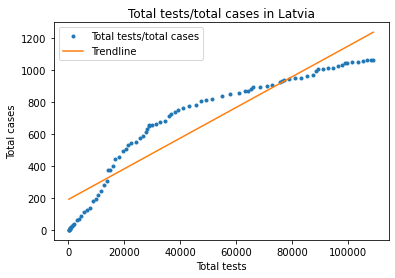

In [64]:
latvia_frame = frame_within_dates[frame_within_dates[interest_columns[0]] == interest_countries[1]]

x = latvia_frame[interest_columns[3]]
y = latvia_frame[interest_columns[2]]
find_corr_trendline_plot(x, y, "Latvia")

#### Correlation coeficient between specified columns

In [65]:
corr_latvia = x.corr(y)
print(corr_latvia)

0.9336697478010739


#### Conclusion:

Latvia has even higher correlation between tests and cases, but in comparison to Lithuania, it has 3 times less tests, but fairly similar cases number, so Latvia might have a less accurate representation of the situation in the country for COVID spread.

#### Estonia

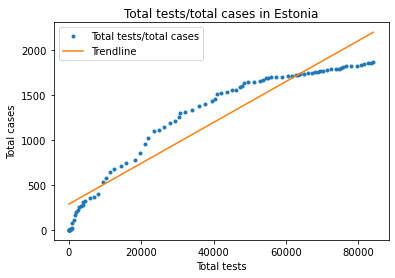

In [66]:
estonia_frame =  frame_within_dates[frame_within_dates[interest_columns[0]] == interest_countries[2]]

x = estonia_frame[interest_columns[3]]
y = estonia_frame[interest_columns[2]]
find_corr_trendline_plot(x, y, "Estonia")

#### Correlation coeficient between specified columns

In [67]:
corr_estonia = x.corr(y)
print(corr_estonia)

0.9517899624877074


#### Conclusion:

Estonia has the highest correlation between tests and cases, but the situation is almost the same as in Latvia. Estonia done at least 3 times less tests than Lithuania in the same time span and has similar confirmed cases number, which also ilustrates that Estonia might have inaccurate information about the spread of COVID.

### Conclusion of the question

All three countries have positive high correlation between `tests done` and `confirmed cases`, but Lithuania made more tests than Latvia and Estonia together. Having this in mind, I think Lithuania does the best job at testing, because a lot of people get tested and then the spread of COVID is more accurate.

<a id='Q3'></a>
## 3. Can we predict how many new cases Lithuania, Latvia and Estonia will have in November 2020?

In [68]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.svm import SVR

#### Let's define the helper functions:

In [69]:
'''
    Get raw frame data for country.
'''
def get_raw_dataframe_for_iso_code(df, iso_code):
    frame = df[df['iso_code'] == iso_code]
    return frame

In [70]:
'''
    Finds all the columns in the dataframe, which has NAN's.
'''
def cols_with_nans(df):
    cols_nans = df.columns[df.isnull().any()]
    return cols_nans

In [71]:
'''
    Prints column names, from the dataframe, which has NAN's and displays the count of NAN's.
'''
def print_cols_with_nans(df, cols_with_nans):
    for column in cols_with_nans:
        print(column, df[column].isnull().sum())

In [72]:
'''
    Generates a dataframe of dates from the given start date (with respect to how many days to forecast).
'''
def create_dates_for_forecasting(start_date, forecast_days):
    dates = pd.date_range(start = start_date, periods = forecast_days + 1, freq = 'D', closed = 'right')
    date_df = pd.DataFrame(index = dates)
    return date_df

In [73]:
'''
    Split dataframe rows by some ratio to train and test data.
    Important: Cannot shuffle as the forecasting is done on time series.
'''
def train_test_split(df, ratio = .7):
    rows_len = len(df)
    split_row_index = int((rows_len) * ratio)
    train_df = df.iloc[:split_row_index]
    test_df = df.iloc[split_row_index:]
    print('Total samples: ', rows_len)
    print('Training samples: ', split_row_index)
    print('Testing samples: ', rows_len - split_row_index)
    return train_df, test_df, split_row_index

In [74]:
'''
    Apply data transformation(pre-processing) for the train and test dataframes.
'''
def data_transformation(scaler, train_data_array, test_data_array):
    train_data_array_transformed = scaler.fit_transform(train_data_array)
    test_data_array_transformed = scaler.fit_transform(test_data_array)
    train_data_array_df = pd.DataFrame(
        train_data_array_transformed,
        index = train_data_array.index,
        columns = [train_data_array.columns[0]]
    )
    test_data_array_df = pd.DataFrame(
        test_data_array_transformed,
        index = test_data_array.index,
        columns = [test_data_array.columns[0]]
    )
    return train_data_array_df, test_data_array_df, scaler

In [75]:
'''
    Create feature vectors with lag number of days added to the original dataframe.
'''
def build_timeseries_features(df, lag_days):
    df_with_timeseries_features = df.copy()
    for i in range(1, lag_days):
        col_name = 'lag' + str(i)
        df_with_timeseries_features[col_name] = df.shift(i)
    return df_with_timeseries_features

In [76]:
'''
    Drop NaN's which were generated during feature build process.
'''
def make_arrays(train_data_df, test_data_df):
    X_train = train_data_df.dropna().drop(train_data_df.columns[0], axis = 1).values
    y_train = train_data_df.dropna()[train_data_df.columns[0]].values
    X_test = test_data_df.dropna().drop(test_data_df.columns[0], axis = 1).values
    y_test = test_data_df.dropna()[test_data_df.columns[0]].values
    return X_train, y_train, X_test, y_test

In [77]:
'''
    Create validation curve, which is a set of forecasted values.
    It will be showed on the plot.
'''
def validation_curve(scaler, y_pred, y, split_row, lag_days):
    y_test = y.iloc[split_row:]
    test_pred = y_test.iloc[lag_days:].copy()
    y_pred_transformed = scaler.inverse_transform([y_pred])
    y_pred_transformed_reshaped = np.reshape(y_pred_transformed, (y_pred_transformed.shape[1],-1))
    test_pred['Forecast'] = np.array(y_pred_transformed_reshaped)
    return test_pred


In [78]:
'''
    Remove nans, zeros and negative values from dataframe column.
'''
def clean_df(df, column):
    df_no_nans = df.dropna()
    df_no_zeros = df_no_nans[df_no_nans[column] != 0]
    df_no_zeros.loc[df_no_zeros[column] < 0] = 0
    return df_no_zeros

In [79]:
'''
    Filter out columns from dataframe.
'''
def filter_relevant_columns(df, relevant_cols):
    filtered_df = df[relevant_cols]
    return filtered_df

In [80]:
'''
    Convert first dataframe column to datetime, set it as index and convert rest of the dataframe to floating point values.
'''
def set_first_column_index_convert_to_datetime_df_to_float(df):
    copy_df = df.copy()
    copy_df[copy_df.columns[0]] = pd.to_datetime(copy_df[copy_df.columns[0]], format = '%Y-%m-%d')
    copy_df = copy_df.set_index(copy_df.columns[0])
    copy_df = copy_df.astype('float')
    return copy_df

#### Let's do some analysis for `Lithuania`

In [81]:
raw_lithuania_frame = get_raw_dataframe_for_iso_code(df, "LTU")
raw_lithuania_frame

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
27602,LTU,Europe,Lithuania,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
27603,LTU,Europe,Lithuania,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
27604,LTU,Europe,Lithuania,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
27605,LTU,Europe,Lithuania,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
27606,LTU,Europe,Lithuania,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,LTU,Europe,Lithuania,2020-10-17,7041.0,281.0,183.286,112.0,2.0,1.286,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
27894,LTU,Europe,Lithuania,2020-10-18,7041.0,0.0,154.000,112.0,0.0,1.286,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
27895,LTU,Europe,Lithuania,2020-10-19,7726.0,685.0,229.143,113.0,1.0,1.429,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858
27896,LTU,Europe,Lithuania,2020-10-20,7726.0,0.0,211.143,113.0,0.0,1.429,...,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56,75.93,0.858


**Let's see which columns has NAN's and how much.**

In [82]:
column_with_nan = cols_with_nans(raw_lithuania_frame)
print_cols_with_nans(raw_lithuania_frame, column_with_nan)

total_cases 68
new_cases 9
new_cases_smoothed 6
total_deaths 81
new_deaths 9
new_deaths_smoothed 6
total_cases_per_million 68
new_cases_per_million 9
new_cases_smoothed_per_million 6
total_deaths_per_million 81
new_deaths_per_million 9
new_deaths_smoothed_per_million 6
total_tests 125
new_tests 159
total_tests_per_thousand 125
new_tests_per_thousand 159
new_tests_smoothed 67
new_tests_smoothed_per_thousand 67
tests_per_case 79
positive_rate 74
tests_units 60
stringency_index 11
handwashing_facilities 296


Let's remove all irrelevant columns from the dataframe as we will do forecasting only on `new_cases`, let's keep in the dataframe only this as the main column and `date` as the index.

In [83]:
filtered_lithuania_df = filter_relevant_columns(raw_lithuania_frame, ["date", "new_cases"])
filtered_lithuania_df = set_first_column_index_convert_to_datetime_df_to_float(filtered_lithuania_df)
filtered_lithuania_df

,new_cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-10-17,281.0
2020-10-18,0.0
2020-10-19,685.0


**Now let's do some cleanup.**

Let's remove all the NAN's and 0's from the column. 

In [84]:
prepared_lithuania_df = clean_df(filtered_lithuania_df, "new_cases")

C:\Users\ovidi\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-78-3a90f204ed0b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_zeros.loc[df_no_zeros[column] < 0] = 0


Let's see if we have any wrong columns.

In [85]:
column_with_nan = cols_with_nans(prepared_lithuania_df)
print_cols_with_nans(prepared_lithuania_df, column_with_nan)

print(prepared_lithuania_df)

            new_cases
date                 
2020-02-28        1.0
2020-03-11        2.0
2020-03-14        3.0
2020-03-15        3.0
2020-03-16        5.0
...               ...
2020-10-15      139.0
2020-10-16      255.0
2020-10-17      281.0
2020-10-19      685.0
2020-10-21      513.0

[215 rows x 1 columns]


As we can see, data now is cleaned and we can move forward.

**Now let's build the model!!**

We will use few different models (as the problem is a regression problem, we need models, which can do regression):
    
- LinearRegression - Ordinary least squares Linear Regression.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

- Ridge - Linear model with L2 regularization.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

- SGDRegressor - Linear model fitting by minimizing regularized empirical loss with Stochastic Gradient Descent.
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

- ElasticNet - Linear regressor with L1 and L2 regularization combined.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet
        
- SVR - Support Vector Regression (SVM for regression problems)
    
https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.svm.SVR.html

#### Below we have a general model class, which allows to build different models, train them and do a forecasting, then plot results.

In [86]:
class Model:
    '''
        Initialize the model class.
    '''
    def __init__(self, scaler, model_type, *args, **kwargs):
        self.model_type = model_type
        self.scaler = scaler
        self.model = self._get_model_pipeline(*args, **kwargs)
    
    '''
        Get the pipeline for the selected model type.
    '''
    def _get_model_pipeline(self, *args, **kwargs):
        pass
        if self.model_type == 'LinearRegression':
            return make_pipeline(linear_model.LinearRegression(*args, **kwargs))
        elif self.model_type == 'Ridge':
            return make_pipeline(linear_model.Ridge(*args, **kwargs))
        elif self.model_type == 'SGDRegressor':
            return make_pipeline(linear_model.SGDRegressor(*args, **kwargs))
        elif self.model_type == 'ElasticNet':
            return make_pipeline(linear_model.ElasticNet(*args, **kwargs))
        elif self.model_type == 'SVR':
            return make_pipeline(SVR(*args, **kwargs))
        else:
            raise Exception("Model type not recognized.")
    
    '''
        Train selected model.
    '''
    def train(self, X_train, y_train, X_test, y_test):
        self.model.fit(X_train, y_train)
        y_pred_test = self.model.predict(X_test)
        self.metrics(X_train, y_train, X_test, y_test)
        return y_pred_test
    
    '''
        Print some metrics about the model.
    '''
    def metrics(self, X_train, y_train, X_test, y_test):
        print('R^2: ', self.r2(X_test, y_test))
    
    '''
        Get the R^2 metric for the model.
    '''
    def r2(self, X_test, y_test):
        return self.model.score(X_test, y_test)
    
    '''
        Do forecasting for desired days count.
    '''
    def forecast(self, X_test, days_to_forecast, lag_days, scaler):
        last_test_sample = X_test[-1]
        X_last_test_sample = np.reshape(last_test_sample, (-1, X_test.shape[1]))
        y_pred_last_sample = self.model.predict(X_last_test_sample)
       
        new_array = X_last_test_sample
        new_predict = y_pred_last_sample
        
    
        forecast = []
        for i in range(0, days_to_forecast):               
            new_array = np.insert(new_array, 0, new_predict)
            new_array = np.delete(new_array, -1)
            new_array_reshaped = np.reshape(new_array, (-1, lag_days))                
            new_predict = self.model.predict(new_array_reshaped)
            temp_predict = scaler.inverse_transform([new_predict])
            forecast.append(temp_predict[0][0].round(2))
        return forecast

The Model class has these methods:
- _get_model_pipeline 

The method creates a scikit `make_pipeline()` pipeline, which can be used to train, predict with many different models, based on the user input, there are predefined list of implemented models *LinearRegression*, *Ridge*, *SGDRegressor*, *ElasticNet*, *SVR*.

- train

The method initiates `fit()` on the created pipeline with dataset which is pre-processed.

- metrics

The method prints some metrics about created model.

- r2

The method evaluates model r2 (coefficient of determination, evaluating variance, how well model could performs with unseen data) score.

- forecast

The method implements forecast, based on the user input, uses previous prediction as a new input for the model and forecasts values for the defined dates.

Now let's define process function, which will allow us to train multiple models and show results for each of the model.

For each model, do pre-processing (train/test dataset split, timeseries features building, generating scaled features), plot *raw data* and *forecasted values* in the same graph. 

In [87]:
'''
    Handle pre-processing, forecasting, plotting results.
'''
def process(country_name, models, processed_dataframe, date_from_which_to_forecast, days_to_forecast, days_to_lag):
    forecast_dates_df = create_dates_for_forecasting(date_from_which_to_forecast, days_to_forecast)

    for model in models:
        column_data = processed_dataframe[[processed_dataframe.columns[0]]]
        train_data, test_data, row_split_index = train_test_split(column_data, .8)
        train_data_scaled, test_data_scaled, scaler = data_transformation(model.scaler, train_data, test_data)
        train_data_with_timeseries_features = build_timeseries_features(train_data_scaled, days_to_lag+1)
        test_data_with_timeseries_features = build_timeseries_features(test_data_scaled, days_to_lag+1)
        X_train, y_train, X_test, y_test = make_arrays(train_data_with_timeseries_features, 
                                                       test_data_with_timeseries_features)
        y_pred_test = model.train(X_train, y_train, X_test, y_test)                       
        test_pred = validation_curve(scaler, y_pred_test, column_data, row_split_index, days_to_lag)        
        forecasted_values = model.forecast(X_test, days_to_forecast, days_to_lag, scaler)            
        forecast_dates_df['ForecastedValues'] = np.array(forecasted_values)
        
        plot_results(country_name, test_pred, forecast_dates_df['ForecastedValues'])
        print(f"Forecasted new_cases in {country_name} - {calculate_forecasted_cases(forecast_dates_df)}, with model - {model.model_type}")
        print('=====================================================')


To plot the results for each of the model, we need to create a function which craetes separate plot with data.

In [88]:
'''
    Plot the forecasted values with raw data.
'''
def plot_results(country_name, raw_values_with_validation_curve, forecasted_values):
    plt.figure(figsize=(25,10))
    plt.plot(raw_values_with_validation_curve)
    plt.plot(forecasted_values, color='green', label='Forecast') 
    plt.ylabel('New cases')
    plt.legend()
    plt.title(f"Forecast for the new cases in - {country_name}")
    plt.show()

Now to calculate the question expected result, we need to define a function, which takes the forecastes dataset, filters out relevant dates and then sums though column to calculate total `new_cases`.

In [89]:
'''
    Calculate results from the forecasted values.
'''
def calculate_forecasted_cases(forecast_dates_df):
    frame_with_relevant_data = forecast_dates_df[(forecast_dates_df.index > "2020-10-31") & (forecast_dates_df.index < "2020-12-01")]
    return int(frame_with_relevant_data.sum(axis=0))
              


Let's train few different models for `Lithuania` dataset.

Total samples:  215
Training samples:  172
Testing samples:  43
R^2:  0.48049360889245507


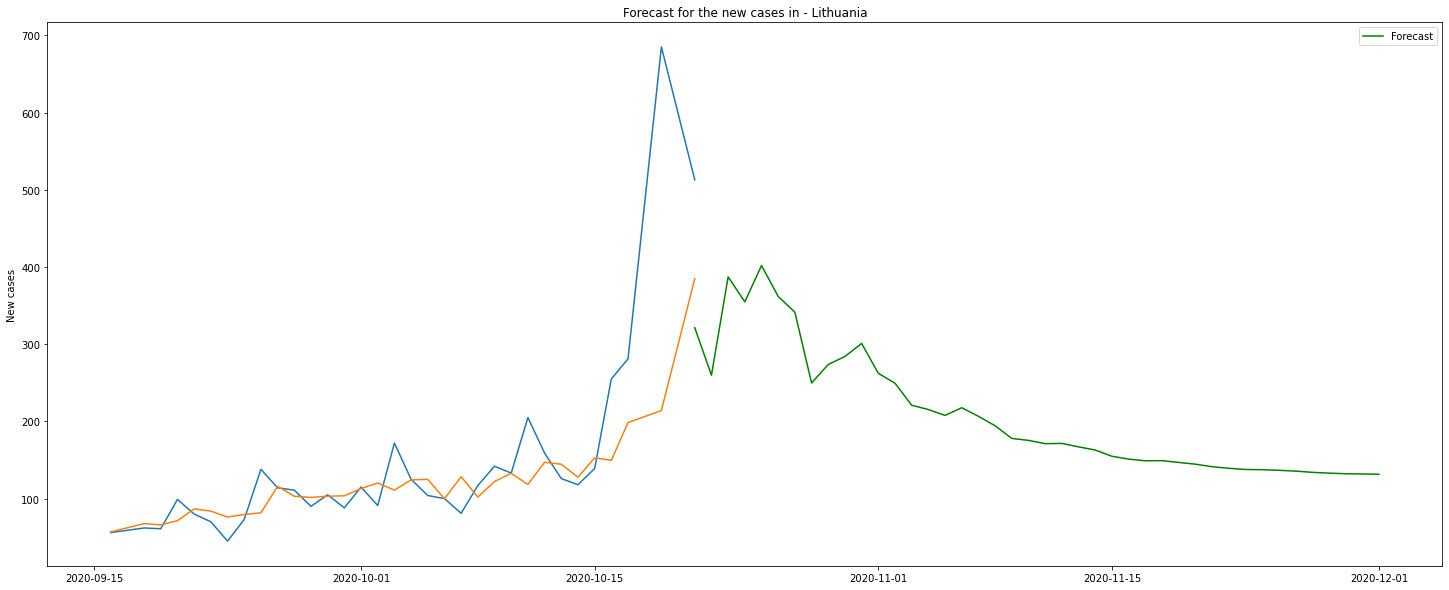

Forecasted new_cases in Lithuania - 5055, with model - LinearRegression
Total samples:  215
Training samples:  172
Testing samples:  43
R^2:  0.4801934837374213


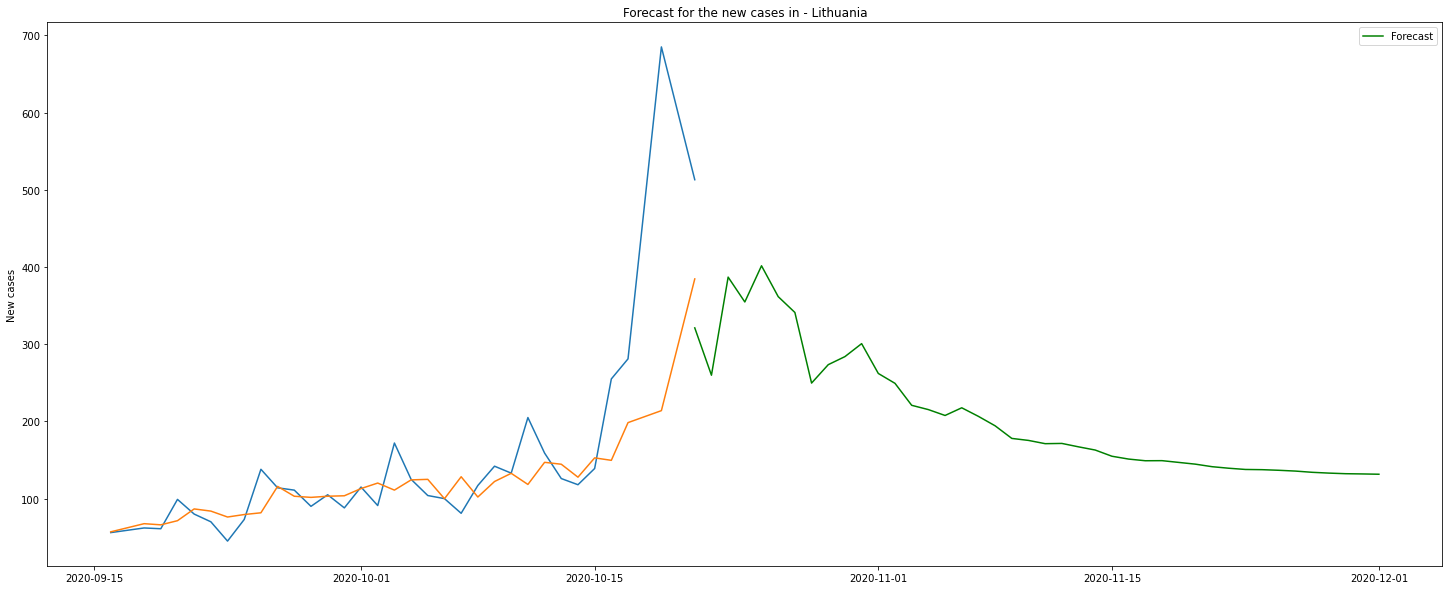

Forecasted new_cases in Lithuania - 5055, with model - Ridge
Total samples:  215
Training samples:  172
Testing samples:  43
R^2:  0.4534063293912297


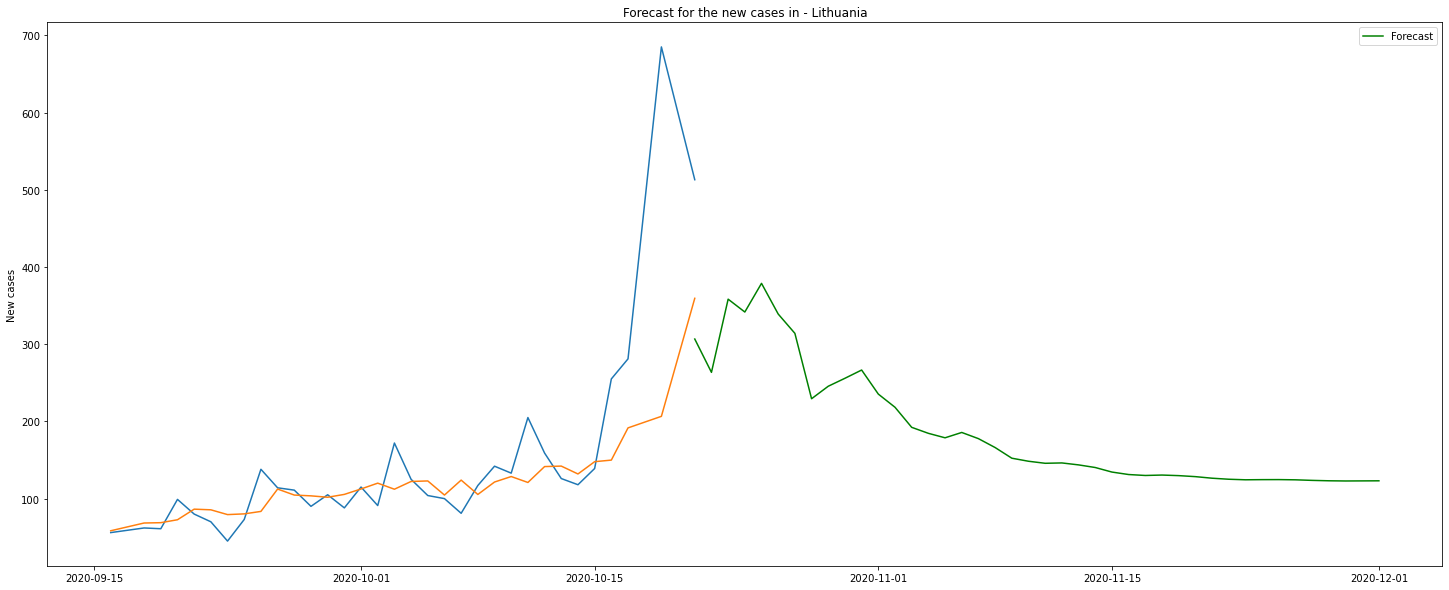

Forecasted new_cases in Lithuania - 4441, with model - SGDRegressor
Total samples:  215
Training samples:  172
Testing samples:  43
R^2:  0.4792571662487256


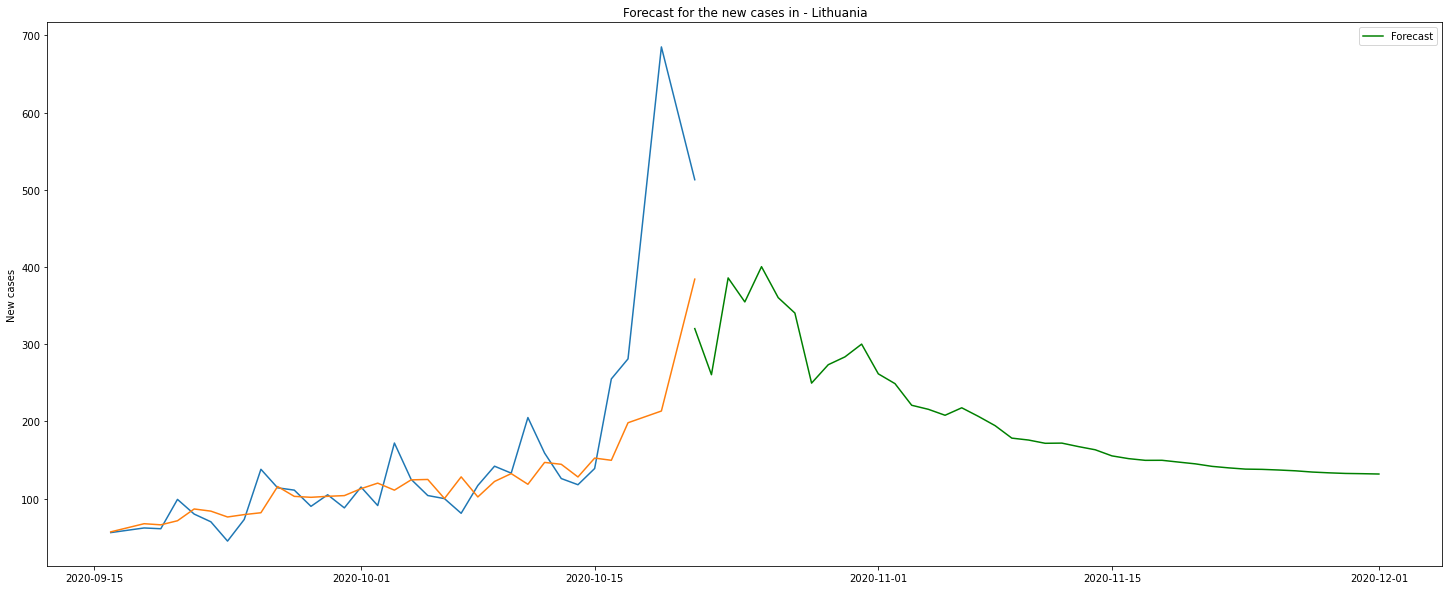

Forecasted new_cases in Lithuania - 5064, with model - ElasticNet
Total samples:  215
Training samples:  172
Testing samples:  43
R^2:  0.24196370942251721


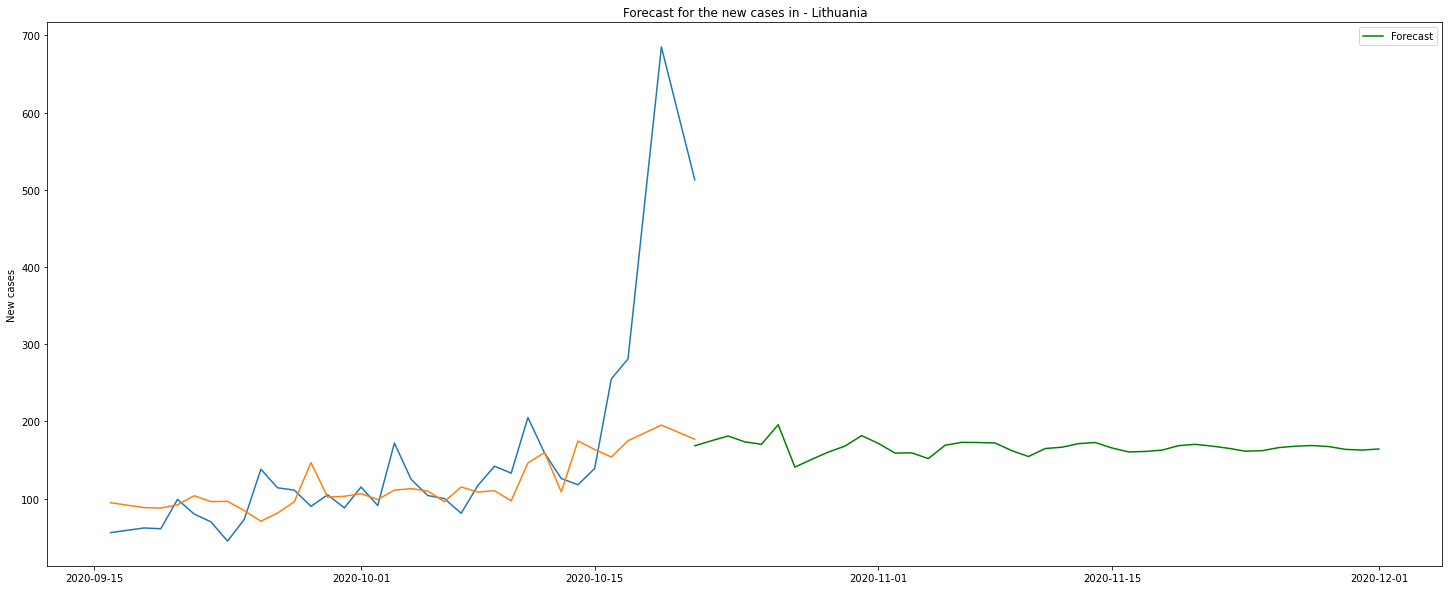

Forecasted new_cases in Lithuania - 4962, with model - SVR


In [90]:
process(
    "Lithuania", 
    [
        Model(RobustScaler(), 'LinearRegression'),
        Model(RobustScaler(), 'Ridge', alpha=1e-1),
        Model(RobustScaler(), 'SGDRegressor'),
        Model(RobustScaler(), 'ElasticNet', alpha=1e-3),
        Model(RobustScaler(), 'SVR', C=10.0, epsilon=0.001)
    ],
    prepared_lithuania_df, 
    '2020-10-20', 
    42,
    10
)

**Latvia**

Let's do the exact same dataset pre-processing (cleanup, filtering...) with Latvia dataset and initiate process.

            new_cases
date                 
2020-03-03        1.0
2020-03-08        1.0
2020-03-09        1.0
2020-03-10        3.0
2020-03-11        2.0
...               ...
2020-10-17      148.0
2020-10-18      188.0
2020-10-19       58.0
2020-10-20       44.0
2020-10-21      115.0

[207 rows x 1 columns]
Total samples:  207
Training samples:  165
Testing samples:  42
R^2:  0.3536102478316122


C:\Users\ovidi\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-78-3a90f204ed0b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_zeros.loc[df_no_zeros[column] < 0] = 0


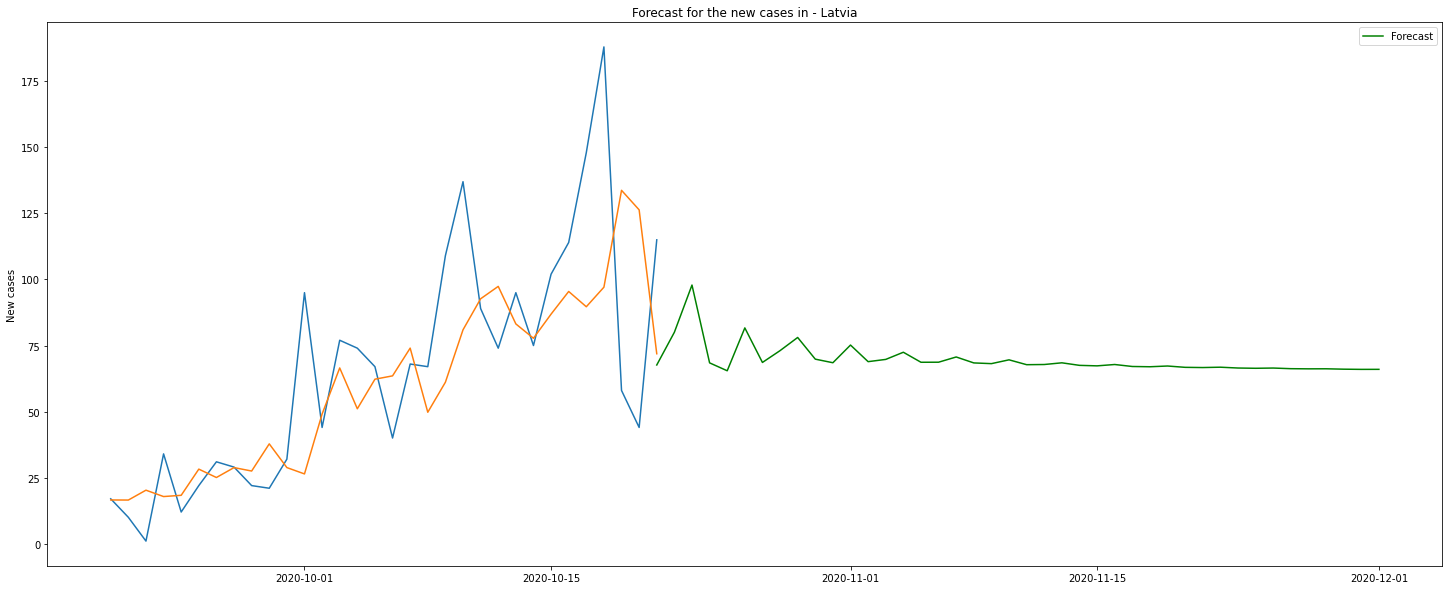

Forecasted new_cases in Latvia - 2038, with model - LinearRegression
Total samples:  207
Training samples:  165
Testing samples:  42
R^2:  0.35389156262274646


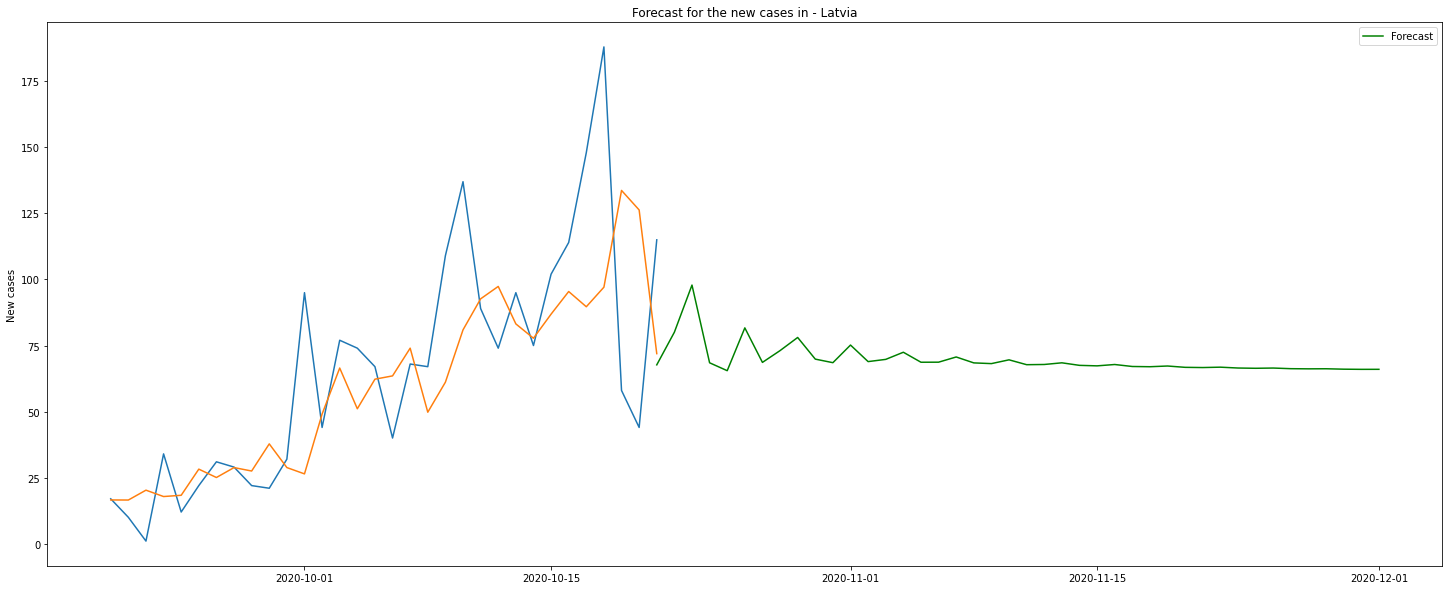

Forecasted new_cases in Latvia - 2038, with model - Ridge
Total samples:  207
Training samples:  165
Testing samples:  42
R^2:  0.375246343601932


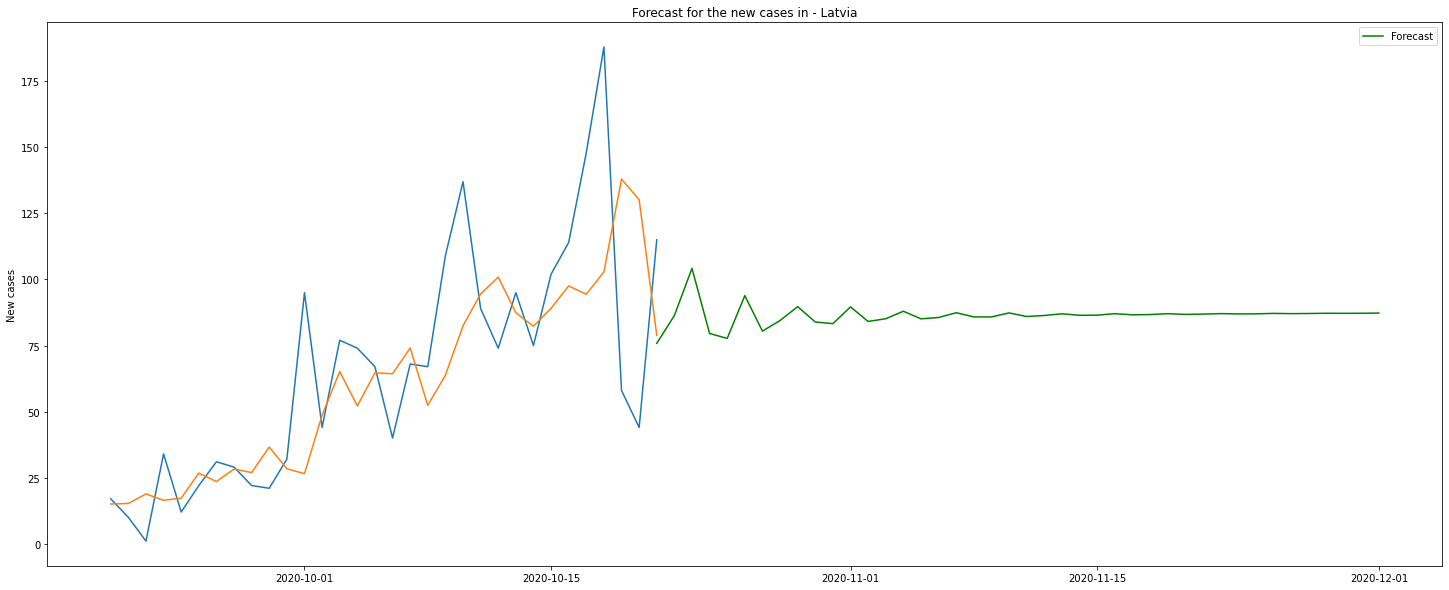

Forecasted new_cases in Latvia - 2601, with model - SGDRegressor
Total samples:  207
Training samples:  165
Testing samples:  42
R^2:  0.353942650372403


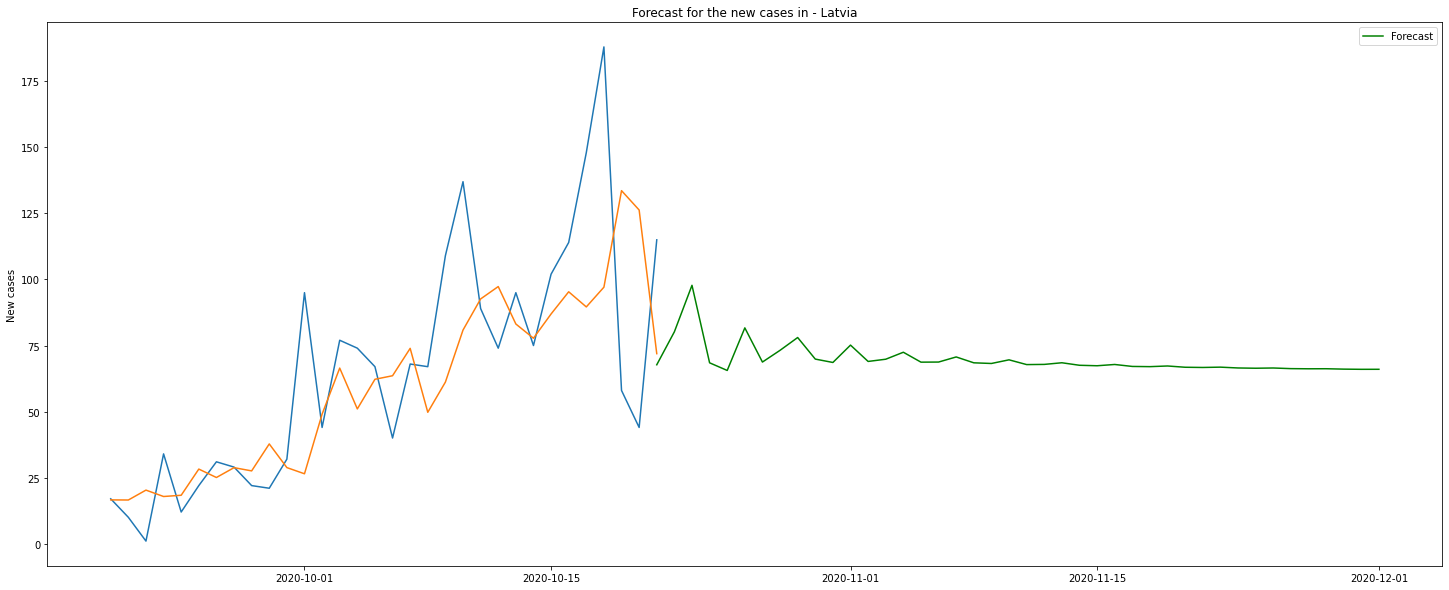

Forecasted new_cases in Latvia - 2039, with model - ElasticNet
Total samples:  207
Training samples:  165
Testing samples:  42
R^2:  0.02477784110082837


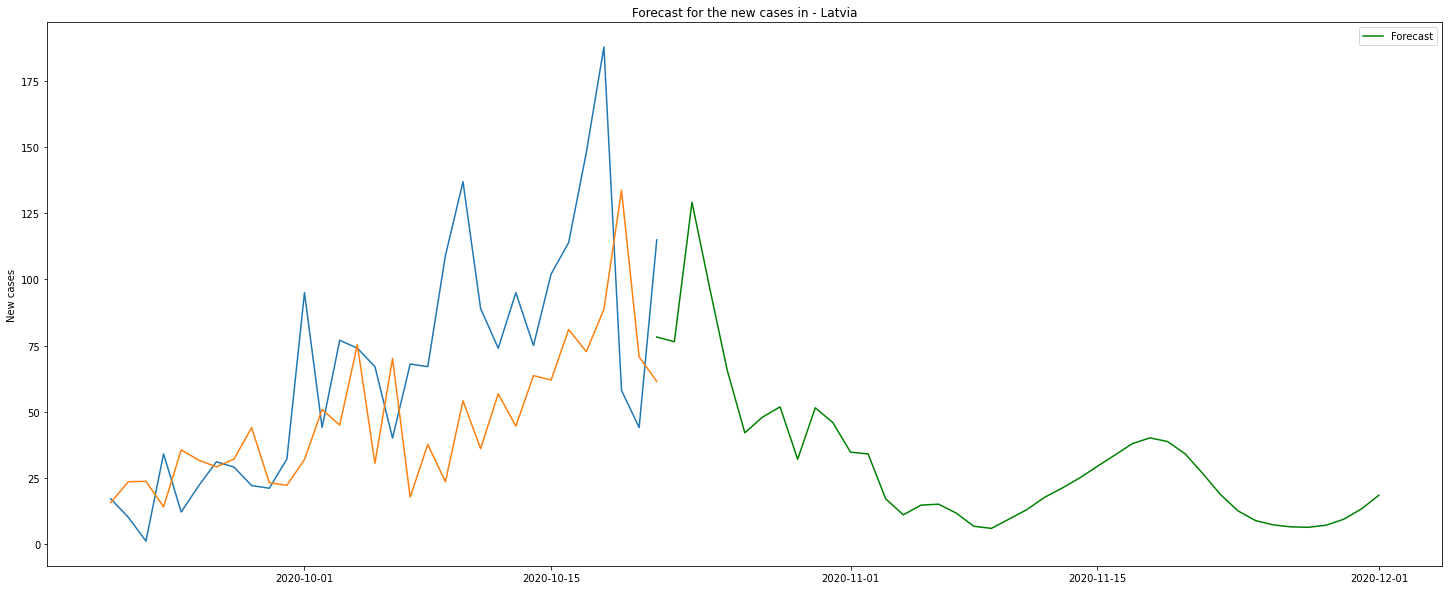

Forecasted new_cases in Latvia - 564, with model - SVR


In [91]:
raw_latvia_frame = get_raw_dataframe_for_iso_code(df, "LVA")
filtered_latvia_df = filter_relevant_columns(raw_latvia_frame, ["date", "new_cases"])
filtered_latvia_df = set_first_column_index_convert_to_datetime_df_to_float(filtered_latvia_df)
prepared_latvia_df = clean_df(filtered_latvia_df, "new_cases")

column_with_nan = cols_with_nans(prepared_latvia_df)
print_cols_with_nans(prepared_latvia_df, column_with_nan)

print(prepared_latvia_df)

process(
    "Latvia",
    [
        Model(RobustScaler(), 'LinearRegression'),
        Model(RobustScaler(), 'Ridge', alpha=1e-1),
        Model(RobustScaler(), 'SGDRegressor'),
        Model(RobustScaler(), 'ElasticNet', alpha=1e-3),
        Model(RobustScaler(), 'SVR', C=10.0, epsilon=0.001)
    ],
    prepared_latvia_df, 
    '2020-10-20', 
    42, 
    10
)

**Estonia**

And for the Estonia dataset...

            new_cases
date                 
2020-02-28        1.0
2020-03-04        1.0
2020-03-06        3.0
2020-03-07        5.0
2020-03-11        3.0
...               ...
2020-10-17       37.0
2020-10-18       35.0
2020-10-19       26.0
2020-10-20        7.0
2020-10-21       42.0

[213 rows x 1 columns]
Total samples:  213
Training samples:  170
Testing samples:  43
R^2:  0.010837118554452352


C:\Users\ovidi\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-78-3a90f204ed0b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_zeros.loc[df_no_zeros[column] < 0] = 0


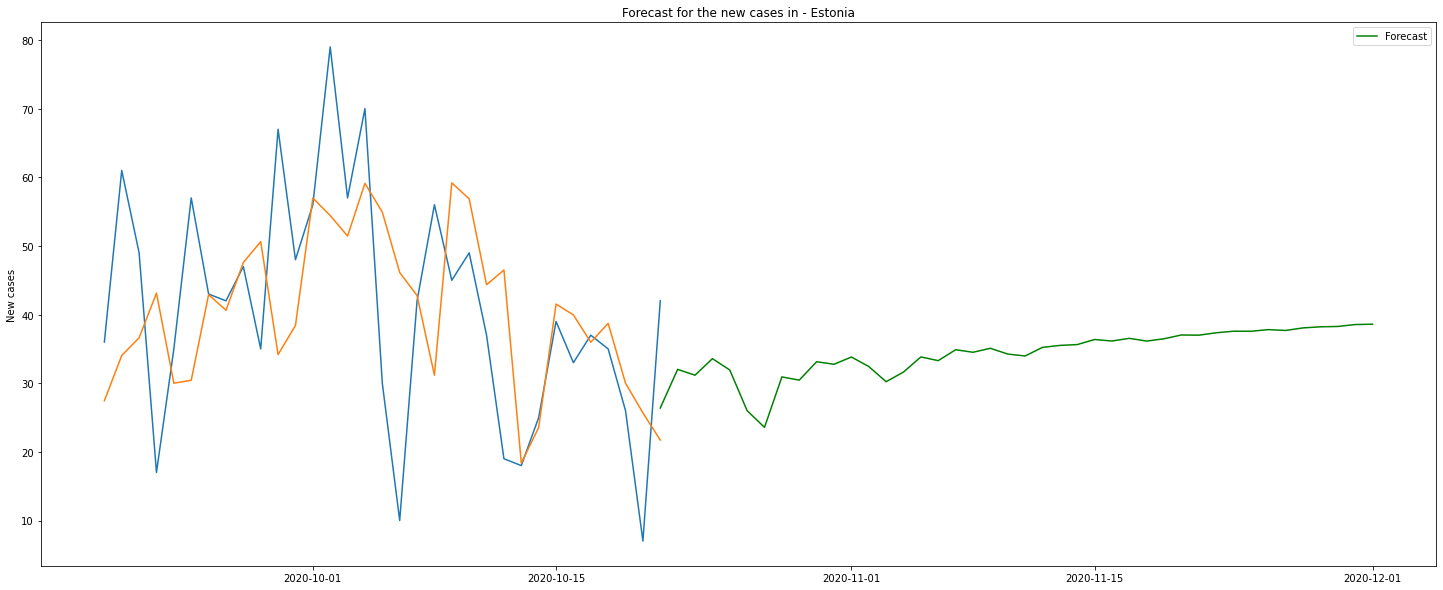

Forecasted new_cases in Estonia - 1071, with model - LinearRegression
Total samples:  213
Training samples:  170
Testing samples:  43
R^2:  0.010837370713874694


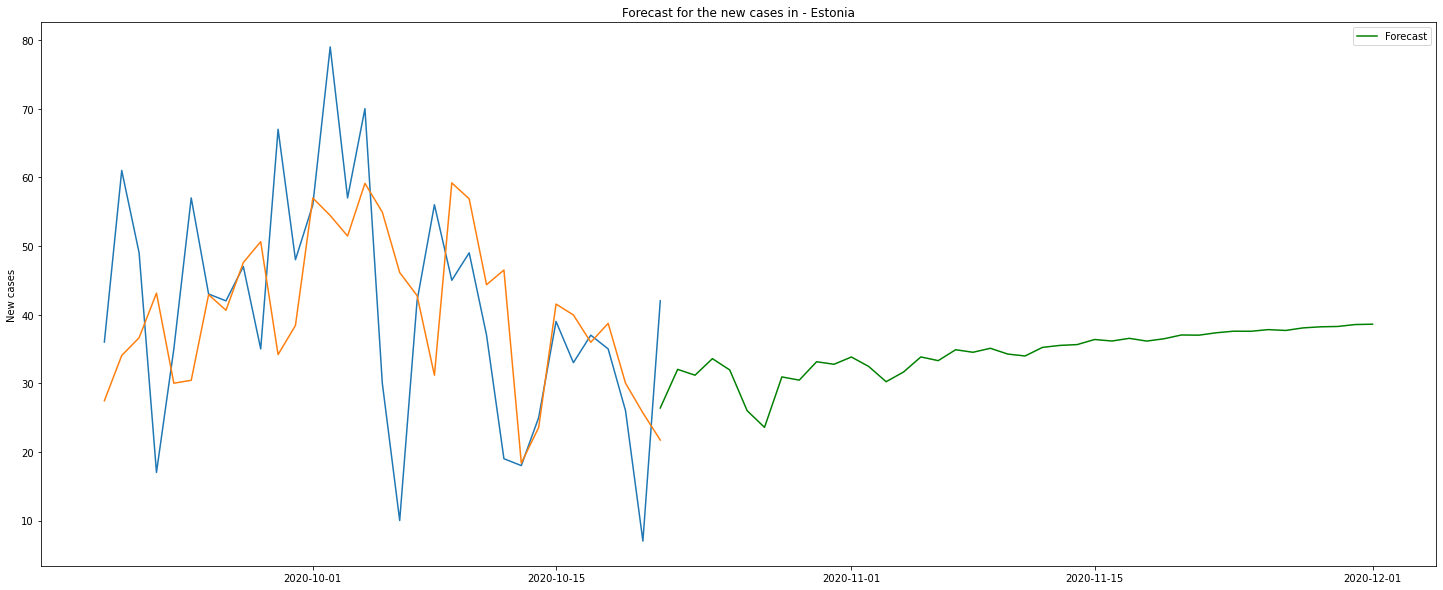

Forecasted new_cases in Estonia - 1071, with model - Ridge
Total samples:  213
Training samples:  170
Testing samples:  43
R^2:  0.016922255516198415


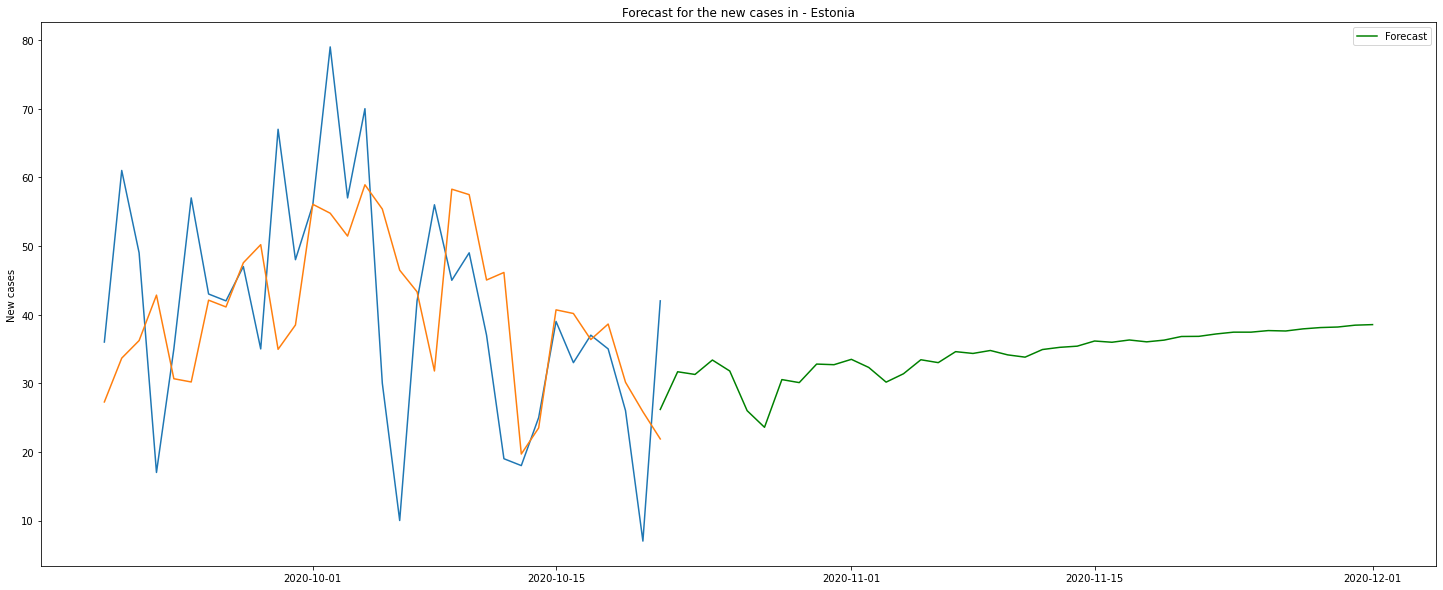

Forecasted new_cases in Estonia - 1065, with model - SGDRegressor
Total samples:  213
Training samples:  170
Testing samples:  43
R^2:  0.01207146905261347


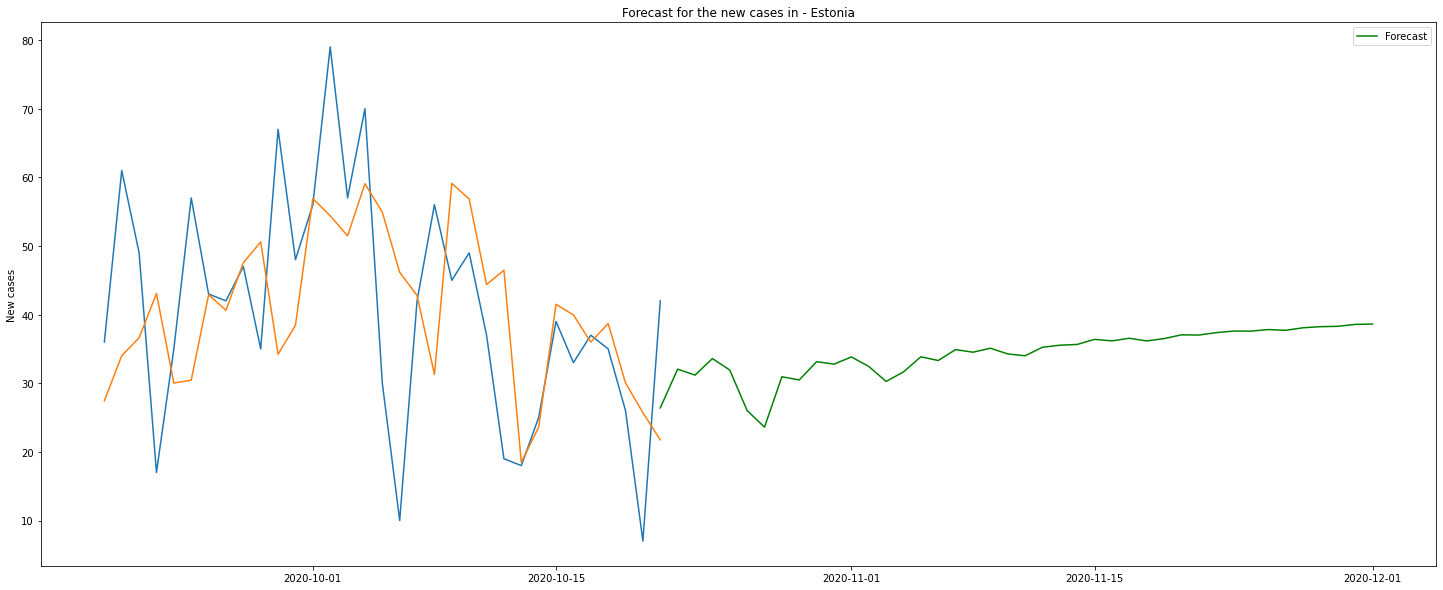

Forecasted new_cases in Estonia - 1071, with model - ElasticNet
Total samples:  213
Training samples:  170
Testing samples:  43
R^2:  -0.009993807554696144


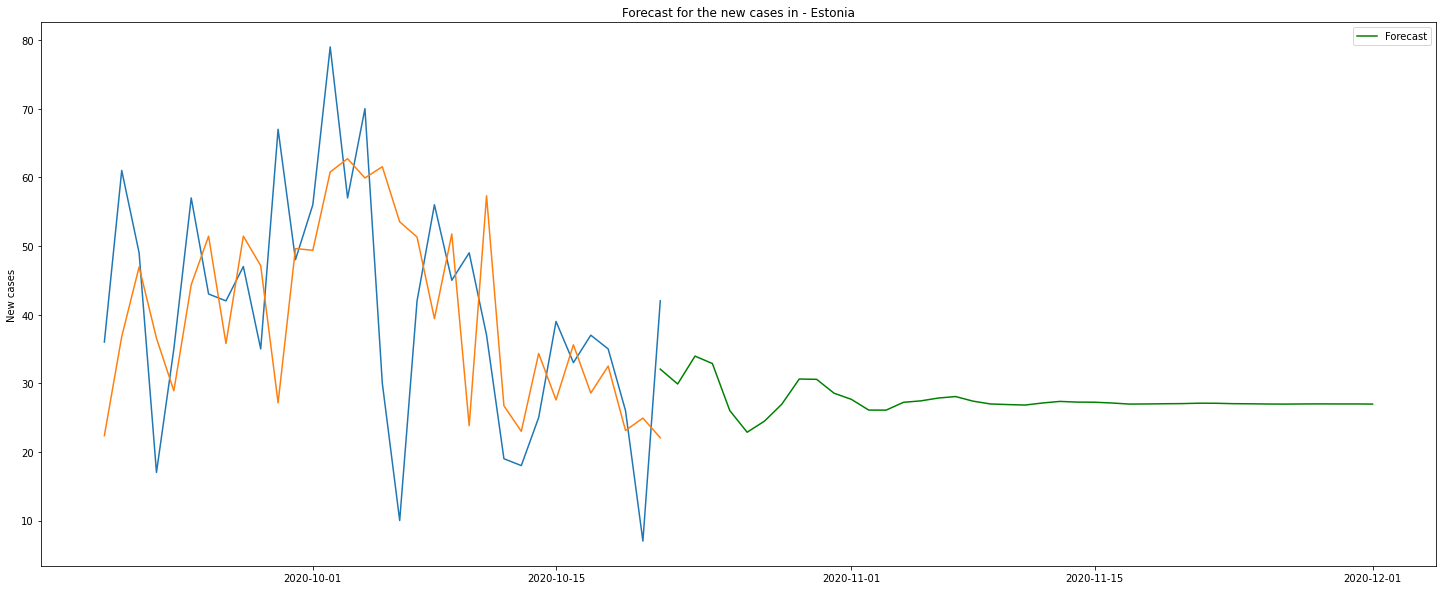

Forecasted new_cases in Estonia - 812, with model - SVR


In [92]:
raw_estonia_frame = get_raw_dataframe_for_iso_code(df, "EST")
filtered_estonia_df = filter_relevant_columns(raw_estonia_frame, ["date", "new_cases"])
filtered_estonia_df = set_first_column_index_convert_to_datetime_df_to_float(filtered_estonia_df)
prepared_estonia_df = clean_df(filtered_estonia_df, "new_cases")

column_with_nan = cols_with_nans(prepared_estonia_df)
print_cols_with_nans(prepared_estonia_df, column_with_nan)

print(prepared_estonia_df)

process(
    "Estonia",
    [
        Model(RobustScaler(), 'LinearRegression'),
        Model(RobustScaler(), 'Ridge', alpha=1e-4),
        Model(RobustScaler(), 'SGDRegressor'),
        Model(RobustScaler(), 'ElasticNet', alpha=1e-3),
        Model(RobustScaler(), 'SVR', C=10.0, epsilon=0.001)
    ],
    prepared_estonia_df, 
    '2020-10-20', 
    42, 
    10
)

### Conclusion:

Forecasting for a long range is usually not accurate. Another issue is that we forecast only on the `new_cases` values, while other columns could be also influential if there are correlations. Also this column value is very messy, so I had to try out few different scalers (MinMaxScaller - normalization, StandardScaler - standardization), but the best results were gathered while using RobustScaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html, which basically allows model to be more robust to very drastic fluctuations in the data (as we can see in the raw curve), but still there are many places which could use improvements (try out different hyperparameters, try some non-linear models, etc.)

Based on the models, which were trained (picked only best R2 value model), `new cases` forecast for 2020 November: 

    Lithuania - 5055
    Latvia - 2601
    Estonia - 1065

